In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Đọc file csv và gắng index với giá Close
df = pd.read_csv('D:/PTDLKD/ProjectData/dataset/KEY.csv')
df1 = df.reset_index()['Close']
df1.describe()

count    3375.000000
mean       14.278945
std         4.808535
min         5.710000
25%         9.885000
50%        13.640000
75%        18.290001
max        27.010000
Name: Close, dtype: float64

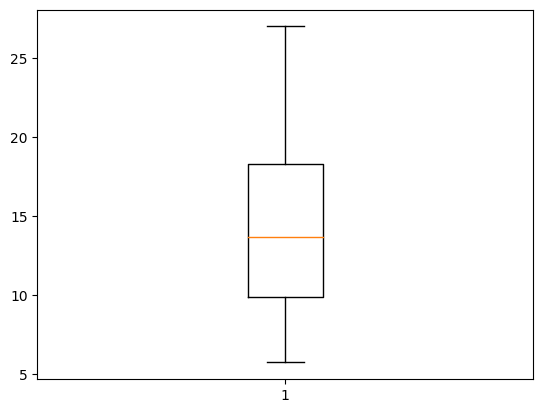

In [3]:
# Tạo plot
plt.boxplot(df1)
plt.show()

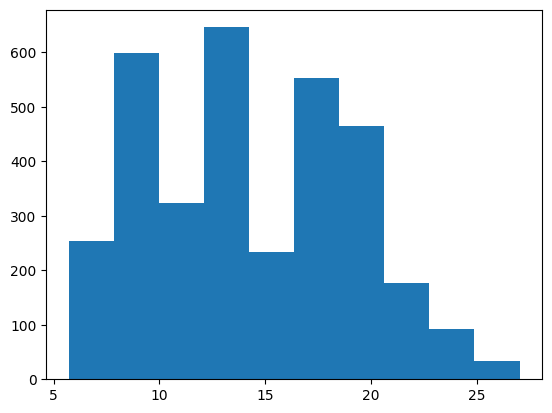

In [4]:
# Tạo Histogram
plt.hist(df1)
plt.show()

In [5]:
# Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [6]:
# Chia train/test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
# Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 614
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
# Fit mô hình GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
# Dự báo dữ liệu
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))
y_test = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val = scaler.inverse_transform(yval.reshape(-1, 1))

In [12]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )
yval = scaler.inverse_transform(yval.reshape(-1,1) )

In [13]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred_val - yval) / yval)) * 100
test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 0.863376838889524
Testing RMSE: 0.33783951118292244
Validation MAE: 0.5591207333843735
Testing MAE: 0.2824212029051697
Validation MAPE: 4.910636704601907
Testing MAPE: 2.3188703118132965


In [14]:
# Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=614
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
    
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.4713615  0.47089202 0.49859155 0.49201883 0.49483568 0.48169014
 0.49483568 0.50234742 0.49671366 0.50892014 0.58450704 0.6
 0.58826291 0.59953052 0.61643192 0.61408455 0.62065728 0.59624413
 0.60281685 0.59061038 0.58403756 0.58638502 0.56666671 0.55164315
 0.51690136 0.54507042 0.52347423 0.53755869 0.56150235 0.58028169
 0.61032859 0.60375587 0.62018779 0.62112681 0.62206568 0.61596244
 0.62723005 0.66103291 0.65774643 0.64647887 0.67793427 0.69389671
 0.70610329 0.74319254 0.7028169  0.67746474 0.7056338  0.70140845
 0.70093892 0.68215962 0.70187793 0.72816897 0.69248822 0.72535211
 0.72253521 0.73145545 0.71173714 0.68544596 0.68873235 0.70469479
 0.68920183 0.66713615 0.63615023 0.63615023 0.66572765 0.67793427
 0.64647887 0.67511737 0.66995305 0.68356808 0.68450709 0.68591549
 0.69624418 0.68638498 0.69953056 0.71032864 0.69342723 0.70845066
 0.69906103 0.7028169  0.69061033 0.66338028 0.69154934 0.6713615
 0.70704225 0.73051643 0.73896718 0.74366192 0.76760559 0.

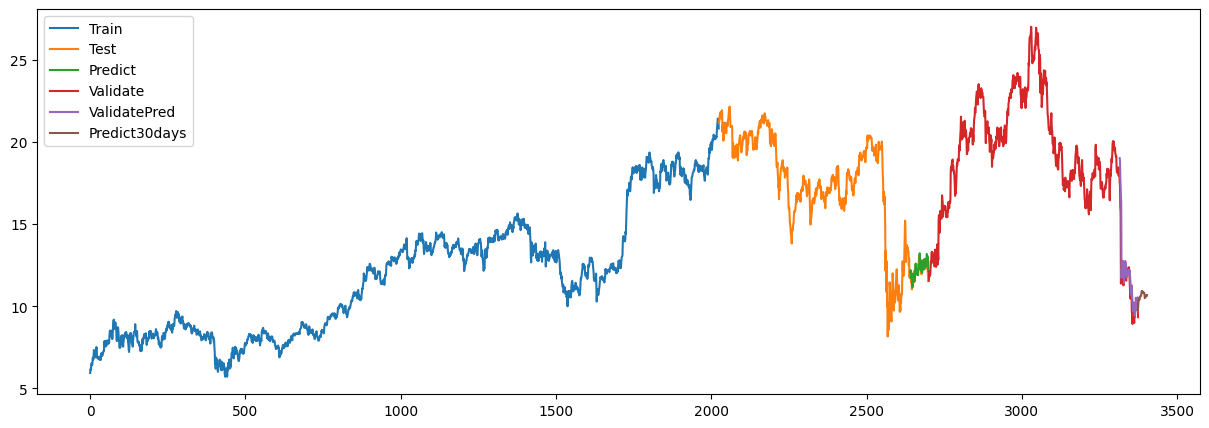

In [15]:
# Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.subplots(figsize=(15, 5))
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+615, stop=train_size+test_size, step=1)
plt.plot(test_data_index[:len(y_pred)], y_pred)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+615, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index[:len(y_pred)],y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index[:len(y_pred)], scaler.inverse_transform(np.reshape(lst_output, (-1, 1))))
plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred', 'Predict30days'])
plt.show()

In [16]:
lst_output_2d = np.array(lst_output).reshape(-1, 1)
scaler.inverse_transform(lst_output_2d)

array([[ 9.81366434],
       [10.12304759],
       [10.4172255 ],
       [10.36880101],
       [10.40124099],
       [10.40124099],
       [10.53006839],
       [10.61045505],
       [10.61045505],
       [10.61045505],
       [10.66051321],
       [10.77857169],
       [10.92587891],
       [10.92268657],
       [10.8216777 ],
       [10.88626511],
       [10.88626511],
       [10.80916175],
       [10.81848536],
       [10.8033509 ],
       [10.82096908],
       [10.69020314],
       [10.49567902],
       [10.5967556 ],
       [10.5967556 ],
       [10.64869462],
       [10.58853498],
       [10.62573174],
       [10.62573174],
       [10.68412522]])